# Machine Efficiency Prediction

## Introduction


## IMPORTS

In [52]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np


## Dataset
- https://www.kaggle.com/datasets/ziya07/intelligent-manufacturing-dataset

In [53]:
# Load the dataset
manufacturing_df = pd.read_csv('manufacturing_6G_dataset.csv')
manufacturing_df.head()

,Timestamp,Machine_ID,Operation_Mode,Temperature_C,Vibration_Hz,Power_Consumption_kW,Network_Latency_ms,Packet_Loss_%,Quality_Control_Defect_Rate_%,Production_Speed_units_per_hr,Predictive_Maintenance_Score,Error_Rate_%,Efficiency_Status
0,2024-01-01 00:00:00,39,Idle,74.137590,3.500595,8.612162,10.650542,0.207764,7.751261,477.657391,0.344650,14.965470,Low
1,2024-01-01 00:01:00,29,Active,84.264558,3.355928,2.268559,29.111810,2.228464,4.989172,398.174747,0.769848,7.678270,Low
2,2024-01-01 00:02:00,15,Active,44.280102,2.079766,6.144105,18.357292,1.639416,0.456816,108.074959,0.987086,8.198391,Low
3,2024-01-01 00:03:00,43,Active,40.568502,0.298238,4.067825,29.153629,1.161021,4.582974,329.579410,0.983390,2.740847,Medium
4,2024-01-01 00:04:00,8,Idle,75.063817,0.345810,6.225737,34.029191,4.796520,2.287716,159.113525,0.573117,12.100686,Low


In [54]:
manufacturing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Timestamp                      100000 non-null  object 
 1   Machine_ID                     100000 non-null  int64  
 2   Operation_Mode                 100000 non-null  object 
 3   Temperature_C                  100000 non-null  float64
 4   Vibration_Hz                   100000 non-null  float64
 5   Power_Consumption_kW           100000 non-null  float64
 6   Network_Latency_ms             100000 non-null  float64
 7   Packet_Loss_%                  100000 non-null  float64
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64
 9   Production_Speed_units_per_hr  100000 non-null  float64
 10  Predictive_Maintenance_Score   100000 non-null  float64
 11  Error_Rate_%                   100000 non-null  float64
 12  Efficiency_Status              

In [55]:
manufacturing_df.describe()

,Machine_ID,Temperature_C,Vibration_Hz,Power_Consumption_kW,Network_Latency_ms,Packet_Loss_%,Quality_Control_Defect_Rate_%,Production_Speed_units_per_hr,Predictive_Maintenance_Score,Error_Rate_%
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,25.499330,60.041458,2.549959,5.745929,25.555620,2.493418,5.008806,275.916324,0.499385,7.504100
std,14.389439,17.323238,1.414127,2.451271,14.120758,1.443273,2.883666,130.096892,0.288814,4.335896
min,1.000000,30.000138,0.100011,1.500183,1.000025,0.000026,0.000449,50.000375,0.000003,0.000112
25%,13.000000,45.031596,1.323214,3.627318,13.355118,1.245026,2.521591,162.873618,0.248166,3.750148
50%,25.000000,60.033597,2.549441,5.755460,25.536079,2.487667,5.003569,276.648922,0.499209,7.504145
75%,38.000000,74.967217,3.776459,7.860267,37.796372,3.741252,7.506127,388.812761,0.748810,11.273189
max,50.000000,89.998979,4.999974,9.999889,49.999917,4.999975,9.999900,499.996768,0.999978,14.999869


In [56]:
manufacturing_df.isnull().sum()

Timestamp                        0
Machine_ID                       0
Operation_Mode                   0
Temperature_C                    0
Vibration_Hz                     0
Power_Consumption_kW             0
Network_Latency_ms               0
Packet_Loss_%                    0
Quality_Control_Defect_Rate_%    0
Production_Speed_units_per_hr    0
Predictive_Maintenance_Score     0
Error_Rate_%                     0
Efficiency_Status                0
dtype: int64

In [57]:
manufacturing_df['Timestamp'] = pd.to_datetime(manufacturing_df['Timestamp'])

# Time-based features
manufacturing_df['hour'] = manufacturing_df['Timestamp'].dt.hour
manufacturing_df['minute'] = manufacturing_df['Timestamp'].dt.minute
manufacturing_df['day_of_week'] = manufacturing_df['Timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday
manufacturing_df['is_weekend'] = manufacturing_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
manufacturing_df['month'] = manufacturing_df['Timestamp'].dt.month

# drop timestamp column
manufacturing_df = manufacturing_df.drop('Timestamp', axis=1)
# manufacturing_df = manufacturing_df.drop('Predictive_Maintenance_Score', axis=1)
# manufacturing_df = manufacturing_df.drop('Temperature_C', axis=1)
# manufacturing_df = manufacturing_df.drop('Error_Rate_%', axis=1)
manufacturing_df.head() 

,Machine_ID,Operation_Mode,Temperature_C,Vibration_Hz,Power_Consumption_kW,Network_Latency_ms,Packet_Loss_%,Quality_Control_Defect_Rate_%,Production_Speed_units_per_hr,Predictive_Maintenance_Score,Error_Rate_%,Efficiency_Status,hour,minute,day_of_week,is_weekend,month
0,39,Idle,74.137590,3.500595,8.612162,10.650542,0.207764,7.751261,477.657391,0.344650,14.965470,Low,0,0,0,0,1
1,29,Active,84.264558,3.355928,2.268559,29.111810,2.228464,4.989172,398.174747,0.769848,7.678270,Low,0,1,0,0,1
2,15,Active,44.280102,2.079766,6.144105,18.357292,1.639416,0.456816,108.074959,0.987086,8.198391,Low,0,2,0,0,1
3,43,Active,40.568502,0.298238,4.067825,29.153629,1.161021,4.582974,329.579410,0.983390,2.740847,Medium,0,3,0,0,1
4,8,Idle,75.063817,0.345810,6.225737,34.029191,4.796520,2.287716,159.113525,0.573117,12.100686,Low,0,4,0,0,1


In [58]:
# Generate the one-hot encoding for 'Operation_Mode' and 'Efficiency_Status'
# Drop the first column from each to avoid perfect multicollinearity
manufacturing_df = pd.get_dummies(manufacturing_df, columns=['Operation_Mode',],prefix=['Operation_Mode'], drop_first=True)

# Convert the one-hot encoded columns to integers (optional)
manufacturing_df = manufacturing_df.astype({'Operation_Mode_Idle': 'int', 'Operation_Mode_Maintenance': 'int'})

# Display the updated DataFrame
manufacturing_df.head()




,Machine_ID,Temperature_C,Vibration_Hz,Power_Consumption_kW,Network_Latency_ms,Packet_Loss_%,Quality_Control_Defect_Rate_%,Production_Speed_units_per_hr,Predictive_Maintenance_Score,Error_Rate_%,Efficiency_Status,hour,minute,day_of_week,is_weekend,month,Operation_Mode_Idle,Operation_Mode_Maintenance
0,39,74.137590,3.500595,8.612162,10.650542,0.207764,7.751261,477.657391,0.344650,14.965470,Low,0,0,0,0,1,1,0
1,29,84.264558,3.355928,2.268559,29.111810,2.228464,4.989172,398.174747,0.769848,7.678270,Low,0,1,0,0,1,0,0
2,15,44.280102,2.079766,6.144105,18.357292,1.639416,0.456816,108.074959,0.987086,8.198391,Low,0,2,0,0,1,0,0
3,43,40.568502,0.298238,4.067825,29.153629,1.161021,4.582974,329.579410,0.983390,2.740847,Medium,0,3,0,0,1,0,0
4,8,75.063817,0.345810,6.225737,34.029191,4.796520,2.287716,159.113525,0.573117,12.100686,Low,0,4,0,0,1,1,0


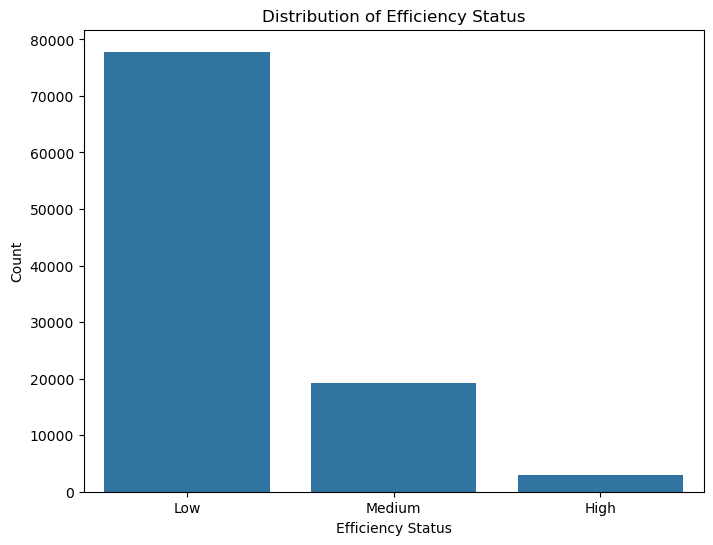

In [59]:
# histogram of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Efficiency_Status', data=manufacturing_df)
plt.xlabel('Efficiency Status')
plt.ylabel('Count')
plt.title('Distribution of Efficiency Status')
plt.show()

In [ ]:
# # visualize correlation matrix
# corr_matrix = manufacturing_df.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.show()

In [60]:
X = manufacturing_df.drop('Efficiency_Status', axis=1)
y = manufacturing_df['Efficiency_Status']
# Make sure categorical target 'Efficiency_Status' is encoded properly
# If it is not encoded, you can convert the target variable to numerical values (e.g., via LabelEncoder)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Scale the features, important for logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [72]:
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#initialize classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GaussianNB": GaussianNB(),
    "KNN": KNeighborsClassifier()  
}


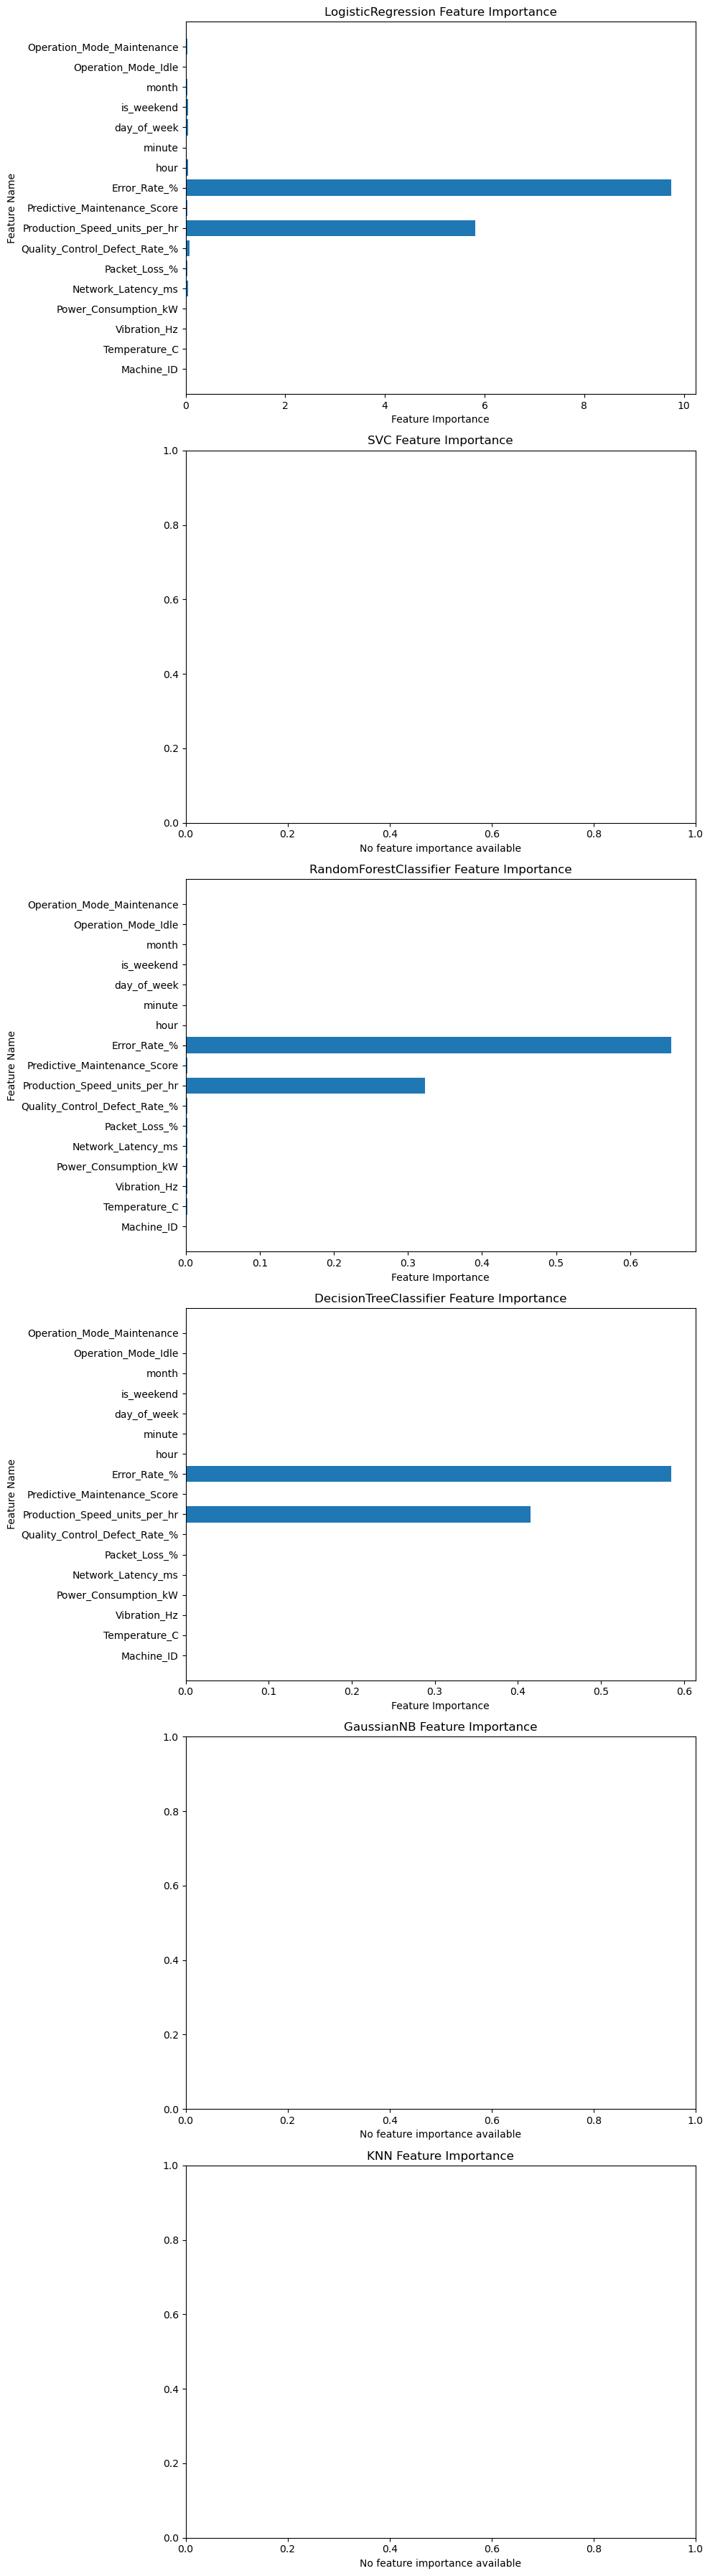

In [74]:
feature_names = X.columns
import matplotlib.pyplot as plt

def plot_feature_importance(feature_names, feature_importances, classifiers):
    classifier_names = list(classifiers.keys())
    importances = feature_importances
    fig, axs = plt.subplots(len(importances), figsize=(10, 6*len(importances)))
    for i, (ax, importance, classifier) in enumerate(zip(axs, importances, classifier_names)):
        if importance is not None:
            ax.barh(feature_names, importance)
            ax.set_xlabel('Feature Importance')
            ax.set_ylabel('Feature Name')
            ax.set_title(f'{classifier} Feature Importance')
        else:
            ax.set_title(f'{classifier} Feature Importance')
            ax.set_xlabel('No feature importance available')
            ax.set_ylabel('')
    plt.tight_layout()
    plt.show()

# Create a list to store the feature importances
feature_importances = []

# Loop through the classifiers
for classifier_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    if hasattr(classifier, 'feature_importances_'):
        feature_importances.append(classifier.feature_importances_)
    elif hasattr(classifier, 'coef_'):
        feature_importances.append(np.abs(classifier.coef_[0]))
    else:
        feature_importances.append(None)

# plot feature importance
plot_feature_importance(feature_names, feature_importances, classifiers)

## LogisticRegression
- with cross validation

In [ ]:



# Ensure the data is loaded correctly and 'Efficiency_Status' is a column
# Define features and target variables
X = manufacturing_df.drop('Efficiency_Status', axis=1)
y = manufacturing_df['Efficiency_Status']

# Make sure categorical target 'Efficiency_Status' is encoded properly
# If it is not encoded, you can convert the target variable to numerical values (e.g., via LabelEncoder)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Scale the features, important for logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model with the desired parameters
log_reg_model = LogisticRegression(max_iter=2000, solver='lbfgs')

# Create a 10-fold cross-validation object
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation using cross_val_score to get accuracy scores
cv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the final cross-validation results (mean and std)
print(f'Final cross-validation accuracy: {cv_scores.mean() * 100:.2f}%')
print(f'Standard deviation of accuracy: {cv_scores.std() * 100:.2f}%')

# Train the model on the entire training set (for final evaluation)
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model performance on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {test_accuracy * 100:.2f}%')

# Display the classification report
print(classification_report(y_test, y_pred))


In [ ]:
print(X_scaled.shape)
print(y_train.shape)

## Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Get confusion matrix
y_true = y_test
y_pred = log_reg_model.predict(X_test)
cm = confusion_matrix(y_true, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["High", "Low", "Medium"], yticklabels=["High", "Low", "Medium"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# print accuracy, precision, recall, f1 score
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average='macro'))
print("Recall:", recall_score(y_true, y_pred, average='macro'))
print("F1 Score:", f1_score(y_true, y_pred, average='macro'))


In [ ]:
# Logit regression results
print(classification_report(y_test, y_pred))



In [ ]:
# Get coefficients and feature names
coefficients = log_reg_model.coef_[0]
feature_names = X.columns

# Sort coefficients by magnitude
sorted_idx = coefficients.argsort()

# Plot feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), coefficients[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Feature Coefficients for Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Get predicted probabilities
y_prob = log_reg_model.predict_proba(X_test)

# Plot distribution of predicted probabilities for each class
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(log_reg_model.classes_):
    plt.hist(y_prob[:, i], bins=20, alpha=0.5, label=f'Class {class_name}')

plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend(loc="best")
plt.show()


# Random Forest Regression

What Might Be a Problem
This level of performance (especially zero misclassifications for classes 0 and 2) is very unusual in real-world ML tasks with imbalanced, ordinal data.

Potential Explanations:
Low model capacity (max_depth=5) might be overfitting to your feature patterns in a way that generalizes well on this test set, but may not elsewhere.

Leakage or very clean data — if your features directly reflect the label or if the data distribution is unusually separable.

Data leakage could be present (e.g., derived features too close to the label).

Test set similarity — if the train-test split results in similar distributions with little randomness, performance can appear inflated.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare features and target
X = manufacturing_df.drop('Efficiency_Status', axis=1)
y = manufacturing_df['Efficiency_Status']

# Encode categorical target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier with class weights
rf_clf = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=5,             # Limit tree depth
    min_samples_split=2,     # Minimum samples required to split a node
    min_samples_leaf=2,      # Minimum samples required to be a leaf node
    class_weight='balanced', # Automatically adjust weights inversely proportional to class frequencies
    random_state=42
)

# Using StratifiedKFold for cross-validation to ensure balanced class distribution in folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation using cross_val_score to get accuracy scores
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=skf, scoring='accuracy')

# Print the final cross-validation results (mean and std)
print(f'Stratified Cross-validation accuracy: {cv_scores.mean() * 100:.2f}%')
print(f'Stratified Cross-validation std: {cv_scores.std() * 100:.2f}%')

# Train the model on the entire training set (for final evaluation)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

# Check accuracy on test set
print(f"Test Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix with Class Weighting and Cross-validation')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Make sure your model is already trained (which it is)
result = permutation_importance(
    rf_clf, X_test, y_test,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

# Get sorted indices for plotting
sorted_idx = result.importances_mean.argsort()

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [manufacturing_df.drop(['Efficiency_Status'], axis=1).columns[i] for i in sorted_idx])
plt.xlabel("Mean Decrease in Accuracy")
plt.title("Permutation Importance of Features (Random Forest)")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Run permutation importance
result = permutation_importance(
    rf_clf, X_test, y_test,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

# Get feature names (drop target and timestamp if included)
feature_names = manufacturing_df.drop(['Efficiency_Status'], axis=1).columns

# Create a DataFrame with results
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean Importance': result.importances_mean,
    'Std Deviation': result.importances_std
}).sort_values(by='Mean Importance', ascending=False)

# Print the top features
print("\nTop Permutation Importances:")
print(importance_df.to_string(index=False))
